In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Read the data
df = pd.read_excel("SP. Dataset - Advanced.xlsx", sheet_name="Dataset", index_col="Date")

# Show the first 5 rows
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price - FTSE 250,Price - FTSE 100,Price - GBP - USD,Price - XLF (financial sector index),Price - EWU,Change % - volatility index,gold price
Date,,,,,,,,,,,,,
2012-12-31,240.245998,243.572501,240.015032,242.463661,176.294033,8.654190e+06,7958.42,5897.81,1.6253,13.31,35.88,-0.2069,1357.398
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,8115.70,6027.37,1.6256,13.69,36.42,NaN,1367.928
2013-01-03,252.449969,256.346271,250.777993,253.690802,184.457215,3.047824e+07,8141.06,6047.34,1.6107,13.68,36.10,-0.0082,1356.426
2013-01-04,254.449875,257.603359,252.924079,255.883361,186.051448,3.391028e+07,8169.14,6089.84,1.6071,13.85,36.36,-0.0501,1335.609
2013-01-07,258.571368,265.438675,254.007233,264.276487,192.154031,6.584778e+07,8186.58,6064.58,1.6114,13.81,36.28,-0.0029,1333.503


In [14]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Price - FTSE 250 ', 'Price - FTSE 100', 'Price - GBP - USD',
       'Price - XLF (financial sector index) ', 'Price - EWU',
       'Change % - volatility index', 'gold price '],
      dtype='object')

In [15]:
# Rename columns
df.rename(columns={'Adj Close':'Adj_Close', 'Price - FTSE 250 ':'FTSE250_Price',
                   'Price - FTSE 100':'FTSE100_Price', 'Price - GBP - USD':'GBP_USD_Price',
                   'Price - XLF (financial sector index) ':'XLF_Price', 'Price - EWU':'EWU_Price', 
                   'Change % - volatility index':'VIX_PC', 'gold price ':'Gold_Price'}, inplace=True)


In [17]:
df.index

DatetimeIndex(['2012-12-31', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14',
               ...
               '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=2528, freq=None)

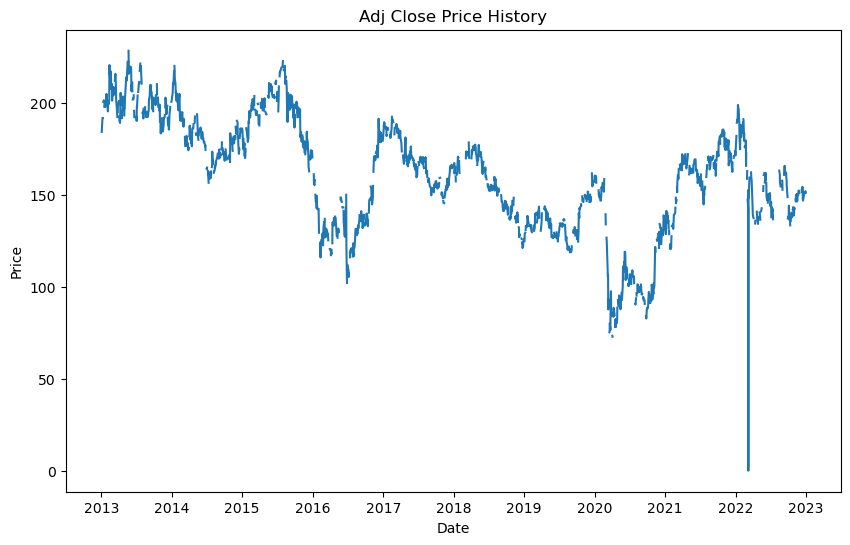

In [18]:
# Visaualize the data
plt.figure(figsize=(10, 6))
plt.plot(df['Adj_Close'])
plt.title('Adj Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()